### Programming and critical analysis

Recall the `pd_speech.arff` dataset from earlier homeworks, centered on the Parkinson diagnosis from 
speech features. For the following exercises, normalize the data using `sklearn`’s `MinMaxScaler`.

1. Using `sklearn`, apply k-means clustering fully unsupervisedly (without targets) on the 
normalized data with 𝑘 = 3 and three different seeds (using random ε {0,1,2}). Assess the 
silhouette and purity of the produced solutions.

3. Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original 
Parkinson diagnoses, and ii) the previously learned 𝑘=3 clusters (random=0). To this end, select 
the two most informative features as axes and color observations according to their label. For feature 
selection, select the two input variables with highest variance on the MinMax normalized data.

4. The fraction of variance explained by a principal component is the ratio between the 
variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues). 
How many principal components are necessary to explain more than 80% of variability? 
Hint: explore the DimReduction notebook to be familiar with PCA in `sklearn`.

### Dúvidas:
1. Como implementar medida de pureza
2. Porque é que está a dar o mesmo valor para random_states diferentes

In [41]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics


# Read the ARFF file and separate input from output data, to encode as numeric
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
scaler = MinMaxScaler()
scaler.fit_transform(X)
truth = np.array(LabelEncoder().fit_transform(df['class']))
# kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


for i in range(0,3):
    # Create the classifier
    kmeans = KMeans(n_clusters=3, init="random", random_state=i)
    # Fit the classifier to the data
    kmeans.fit(X)
    # Determine the silhouette score
    sil_score = silhouette_score(X, kmeans.labels_)
    
    # Match labels to closest real data classification
    k_labels = kmeans.labels_
    k_labels_matched = np.empty_like(k_labels)
    for k in np.unique(k_labels):
        # find and assign the best-matching truth label
        match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]
        k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]

    # Determine confusion matrix
    cm = metrics.confusion_matrix(truth, k_labels_matched, labels=[0,1])

    # Determine the purity score
    sum = 0
    for i in range(0,2):
        sum += np.max(cm[i])
    purity = sum / truth.size

    print("Silhouette score for iteration", i, "is", sil_score)
    print("Purity score for iteration", i, "is", purity)


Silhouette score for iteration 1 is 0.6061811635543624
Purity score for iteration 1 is 0.9656084656084656
Silhouette score for iteration 1 is 0.6018867012912252
Purity score for iteration 1 is 0.958994708994709
Silhouette score for iteration 1 is 0.6018867012912252
Purity score for iteration 1 is 0.958994708994709


### 2. What is causing the non-determinism?
The non-determinism is being caused by the random_state attribution. By using a different seed, the clusters will be initialized in different positions, and might converge slightly differently, although the variability is minimal, as can be seen by noting the fact that two of the iterations produced the same sillhouette and purity results.

### 3.
Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original
Parkinson diagnoses, and ii) the previously learned 𝑘 = 3 clusters (random= 0). To this end, select
the two most informative features as axes and color observations according to their label. For feature
selection, select the two input variables with highest variance on the MinMax normalized data.

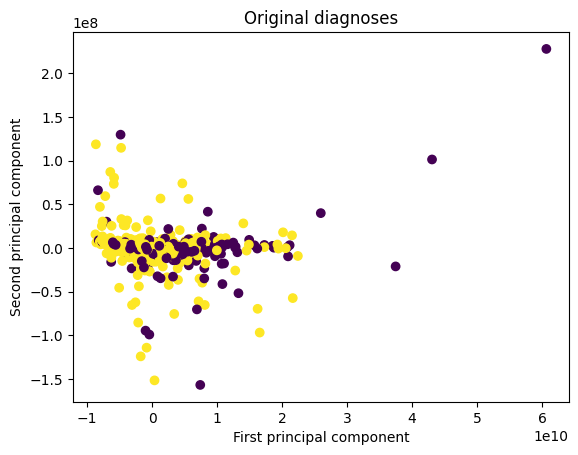

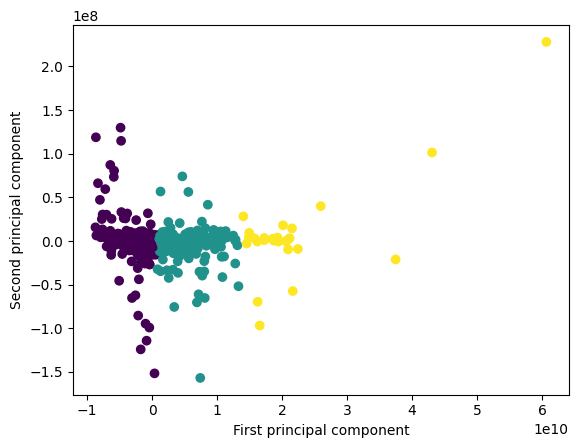

In [49]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt


# Read the ARFF file and separate input from output data, to encode as numeric
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
scaler = MinMaxScaler()
scaler.fit_transform(X)
truth = np.array(LabelEncoder().fit_transform(df['class']))

# Determine the two most informative features
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Plot the original diagnoses
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=truth, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Original diagnoses')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
klabels = kmeans.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=klabels, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()




# 4
The fraction of variance explained by a principal component is the ratio between the
variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues).
How many principal components are necessary to explain more than 80% of variability?
Hint: explore the DimReduction notebook to be familiar with PCA in sklearn.

[9.99984301e+01 1.11914523e-03 3.51348081e-04 5.55325445e-05
 1.66975144e-05 1.31152327e-05 5.37031062e-06 2.66545416e-06
 2.05483373e-06 8.58709547e-07]
[0.9999843  0.99999549 0.99999901 0.99999956 0.99999973 0.99999986
 0.99999991 0.99999994 0.99999996 0.99999997]


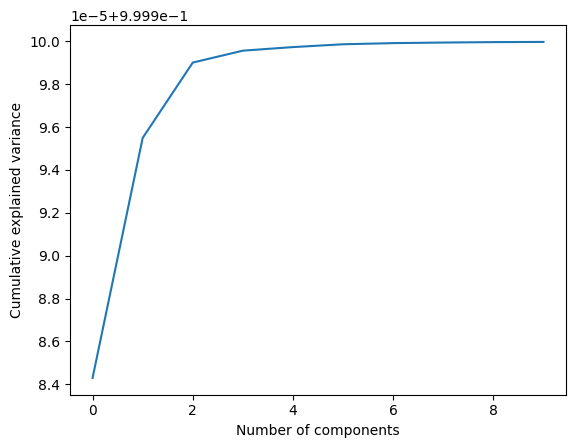

In [60]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt


# Read the ARFF file and separate input from output data, to encode as numeric
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
scaler = MinMaxScaler()
scaler.fit_transform(X)
truth = np.array(LabelEncoder().fit_transform(df['class']))

# Determine the two most informative features
pca = PCA(n_components=10)
pca.fit(X)
print((pca.explained_variance_ratio_) * 100)
cs = np.cumsum(pca.explained_variance_ratio_)
print(cs)

plt.plot(cs)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
